In [ ]:
#Classifying wine classes based on features

### Task1

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

In [ ]:
#loading dataset from sklearn

In [2]:
from sklearn.datasets import load_wine

In [3]:
wine=load_wine()

In [14]:
x=pd.DataFrame(wine.data,columns=wine.feature_names)

In [15]:
y=wine.target

In [16]:
x.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [13]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [18]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [19]:
#data exploration

In [20]:
x.shape

(178, 13)

In [21]:
y.shape

(178,)

In [23]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

<Figure size 720x720 with 0 Axes>

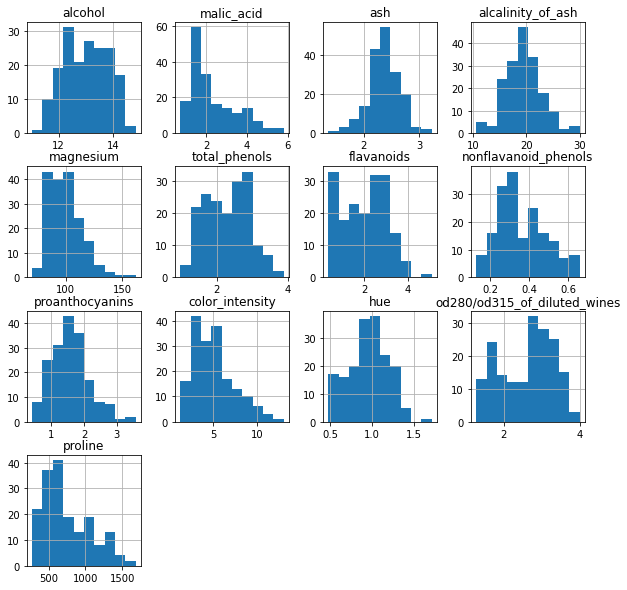

In [30]:
#histogram of all features
x.hist(figsize=(10,10))
plt.show()

In [31]:
#many features are normally distributed but are skewed only either sides

In [32]:
#no need of label encoding since all are numeric

In [33]:
#normalizing the data to 0 mean and unit SD

In [34]:
scaler=StandardScaler()

In [35]:
x=scaler.fit_transform(x)

In [ ]:
#train test split

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

### Task2

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
#building model with default k=5
model=KNeighborsClassifier().fit(x_train,y_train)

In [40]:
#train accuracy
model.score(x_train,y_train)

0.9859154929577465

In [41]:
#test accuracy
model.score(x_test,y_test)

0.9444444444444444

### Task3

In [ ]:
#hyperparameter k selection and using it to build the model

In [56]:
error=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred=knn.predict(x_test).ravel()
    error.append(np.mean(pred != (y_test)))

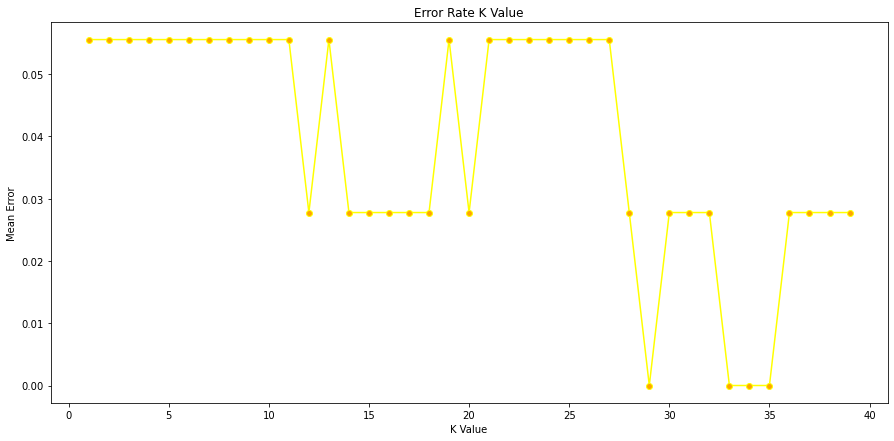

In [71]:
plt.figure(figsize=(15,7))
plt.plot(range(1,40),error,marker="o",color="yellow",markerfacecolor="orange")
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

In [72]:
#here around 15 error is stabilized . so choosing 15 as k

In [73]:
model=KNeighborsClassifier(n_neighbors=15).fit(x_train,y_train)

In [74]:
model.score(x_train,y_train)

0.971830985915493

In [75]:
#test accuracy
model.score(x_test,y_test)

0.9722222222222222

In [76]:
y_pred=model.predict(x_test)

In [79]:
#y actual vs predicted
dfy=pd.DataFrame({"actual":y_test,"predicted":y_pred})
dfy

,actual,predicted
0,0,0
1,0,0
2,2,2
3,0,0
4,1,1
5,0,0
6,1,1
7,2,2
8,1,1
9,2,2


In [80]:
#wrongly predicted y
dfy[dfy["actual"]!=dfy["predicted"]]

,actual,predicted
27,1,0


In [94]:
#features of wrongly predicted class
x_test[dfy[dfy["actual"]!=dfy["predicted"]].index]

array([[-0.77898029, -1.01108137,  0.70724686, -0.41888069, -0.12228166,
         0.20011141,  0.6231926 ,  0.06563943,  0.85694632, -0.19815593,
         1.02027808, -0.44023779, -0.21939015]])

In [108]:
model.kneighbors()

(array([[1.78396283, 3.91726793, 3.95614541, ..., 5.18808852, 5.20594947,
         5.29463053],
        [2.22137557, 2.49291949, 2.57430814, ..., 3.24963051, 3.27038706,
         3.3657489 ],
        [1.38402544, 2.48989427, 2.62244453, ..., 3.31124567, 3.31879822,
         3.33983521],
        ...,
        [2.21786862, 2.33580716, 2.45452665, ..., 3.24580717, 3.28370579,
         3.31095843],
        [1.24538798, 1.67305232, 2.38641061, ..., 3.10469504, 3.19440774,
         3.20304188],
        [1.61965696, 1.83127383, 2.22060576, ..., 2.76141684, 2.78999698,
         2.79966601]]),
 array([[  3, 135, 123, ..., 113, 115,  12],
        [ 91,  60, 105, ..., 135,  18,  96],
        [109,  44,  25, ...,  47,   5,  22],
        ...,
        [ 99,  77,  37, ...,  86,  61,   9],
        [111,  93, 116, ...,  18, 129,  65],
        [ 68,  58,  42, ...,  62,  52,   5]], dtype=int64))

In [ ]:
#model evaluation metrics

In [96]:
accuracy_score(y_test,y_pred)

0.9722222222222222

In [100]:
precision_score(y_test,y_pred,average="weighted")

0.974074074074074

In [101]:
recall_score(y_test,y_pred,average="weighted")

0.9722222222222222

In [102]:
f1_score(y_test,y_pred,average="weighted")

0.9721867461331064

In [ ]:
# Model built with tuning k is giving higher test accuracy than the one with default k.
#Overall this model is very good with high accuracy and less error